In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Cleaning 
Data from: http://www1.nyc.gov/site/planning/data-maps/nyc-population/american-community-survey.page

In [28]:
demo = pd.read_excel('../data/dem_2013acs5yr_nta.xlsx', sheetname='DemData')

In [70]:
ancest = pd.read_excel('../data/ancest_2014acs5yr_puma.xlsx', sheetname='Manhattan')

In [71]:
pumas = ancest.ix[4, 1:].fillna(method='pad').values

In [72]:
vals = ancest.ix[5, 1:].values

In [73]:
mix = pd.MultiIndex.from_tuples(zip(pumas, vals))

In [74]:
an = ancest.ix[8:115]

In [75]:
an.index = an.ix[:,0]

In [84]:
ancest.index = ancest.ix[:, 0]

In [85]:
reindexed = an.drop(an.columns[0], axis=1)

In [86]:
reindexed.columns = mix

In [88]:
reindexed.shape


(108, 20)

In [90]:
race_cols

['HspE', 'WtNHE', 'BlNHE', 'AIANNHE', 'AsnNHE', 'NHPINHE', 'OthNHE']

In [92]:
demo[demo.GeogName.str.contains('Chel')].GeoID

96    MN13
Name: GeoID, dtype: object

In [173]:
chels = reindexed['PUMA 3807: Manhattan Community District 4 & 5--Chelsea, Clinton & Midtown Business District']

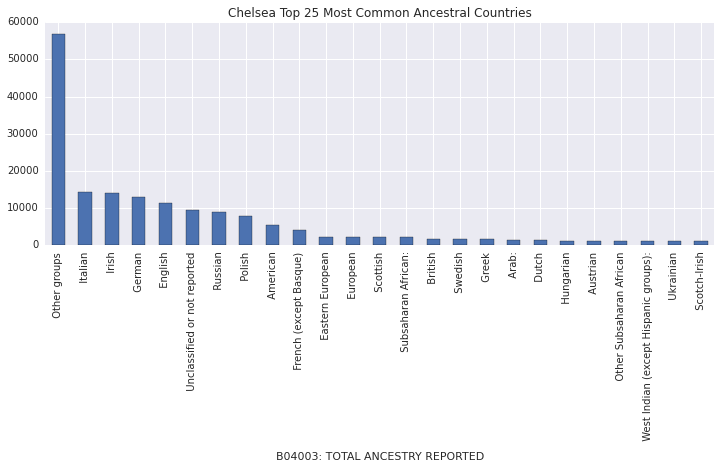

In [183]:
chels.Estimate.order(ascending=False)[:25].plot(kind='Bar', figsize=(12,4)).set_title('Chelsea Top 25 Most Common Ancestral Countries')

In [155]:
bvill = reindexed['PUMA 4007: Brooklyn Community District 16--Brownsville & Ocean Hill']

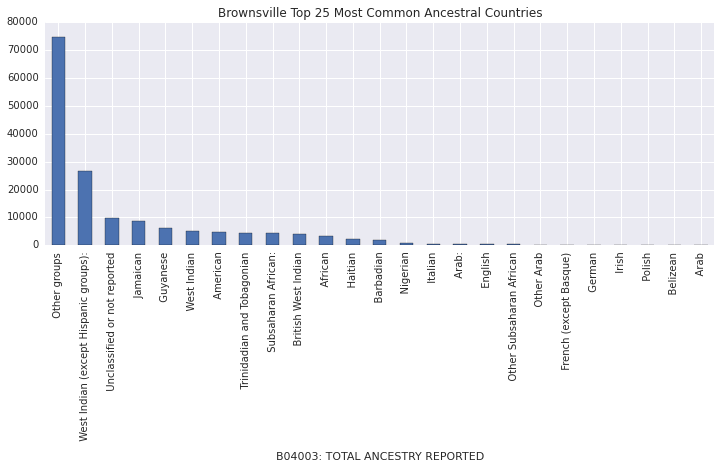

In [182]:
bvill.Estimate.order(ascending=False)[:25].plot(kind='Bar', figsize=(12,4)).set_title('Brownsville Top 25 Most Common Ancestral Countries')

In [128]:
new_dfs = []
for dist in mix.levels[0]:
    df = reindexed[dist].reset_index()
    new_dfs.append(df)

In [129]:
catted = pd.concat(new_dfs)
catted.columns = ['country', 'estimate', 'margin_of_error']

In [104]:
age.head()

,Borough,GeogName,GeoID,variable,value
0,Brooklyn,Brooklyn Heights-Cobble Hill ...,BK09,Pop10t14E,567
1,Brooklyn,Sheepshead Bay-Gerritsen Beach-Manhattan Beac ...,BK17,Pop10t14E,3547
2,Brooklyn,Brighton Beach ...,BK19,Pop10t14E,1305
3,Brooklyn,Seagate-Coney Island ...,BK21,Pop10t14E,1678
4,Brooklyn,West Brighton ...,BK23,Pop10t14E,359


### Project Plots

In [102]:
df = demo[(demo.GeogName.str.contains('Chels')) | 
     ((demo.GeogName.str.contains('Brown')))][target_cols]

In [26]:
gb_melt = pd.melt(df[loc_cols + gender_cols], 
                  id_vars='GeogName', value_vars=gender_cols)
gb_melt.replace({'MaleE': 'Male', 'FemE': 'Female'}, inplace=True)

#### Gender Distribution

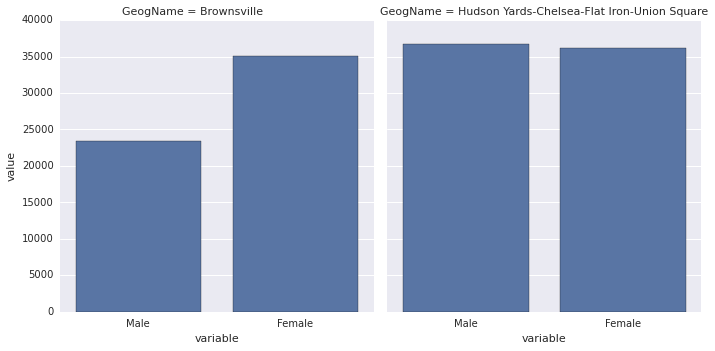

In [112]:
g = sns.FacetGrid(gb_melt, col="GeogName", size=5)
g = g.map(sns.barplot, 'variable', 'value')

### Race Distribution

In [110]:
rb_melt = pd.melt(df[loc_cols + race_cols], 
                  id_vars='GeogName', value_vars=race_cols)
rb_melt.replace({
    'HspE': 'Hispanic',
    'WtNHE': 'White',
    'BlNHE': 'Black',
    'AIANNHE': 'Amer. Indian',
    'AsnNHE': 'Asian',
    'NHPINHE': 'Hawaiian',
    'OthNHE': 'Other'
}, inplace=True)

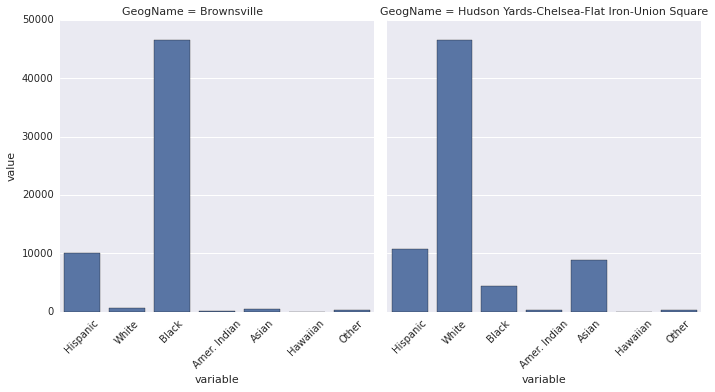

In [111]:
g = sns.FacetGrid(rb_melt, col="GeogName", size=5)
g = g.map(sns.barplot, 'variable', 'value')
g.set_xticklabels(rotation=45)

### Age Distribution

In [114]:
ab_melt = pd.melt(df[loc_cols + age_cols], 
                  id_vars='GeogName', value_vars=age_cols)
ab_melt['variable'] = ab_melt.variable.apply(lambda v: v[:-1])

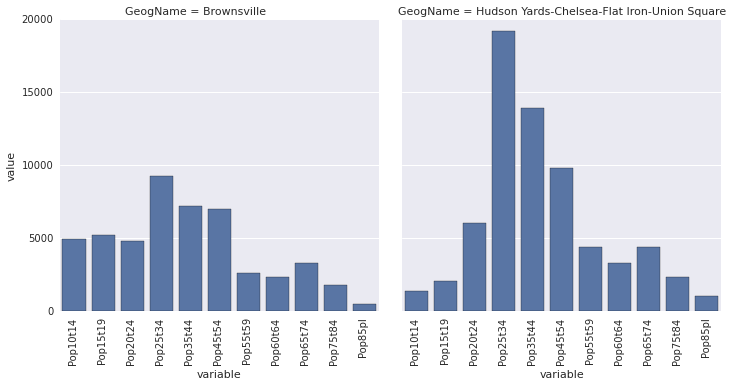

In [115]:
g = sns.FacetGrid(ab_melt, col="GeogName", col_wrap=3, size=5)
g = g.map(sns.barplot, 'variable', 'value')
g.set_xticklabels(rotation=90)

### Desired Data Shape
(neighborhoods, (borough, neighborhood, comdist, puma, pop, gender, nationalities, disability, ancestry))

In [54]:
target_cols = [
    'GeogName', 'GeoID', 'Borough',
    'ComDst', 'PopE', 'PopC',
    'MaleE', 'MaleC', 'FemE', 'FemC',
    'PopU5E', 'PopU5C', 'Pop5t9E', 'Pop5t9C',
    'Pop10t14E', 'Pop10t14C', 'Pop15t19E', 'Pop15t19C',
    'Pop20t24E', 'Pop20t24C', 'Pop25t34E', 'Pop25t34C',
    'Pop35t44E', 'Pop35t44C', 'Pop45t54E', 'Pop45t54C',
    'Pop55t59E', 'Pop55t59C', 'Pop60t64E', 'Pop60t64C',
    'Pop60t64E', 'Pop60t64C', 'Pop65t74E', 'Pop65t74C',
    'Pop75t84E', 'Pop75t84C', 'Pop85plE', 'Pop85plE',
    'HspE', 'HspC', 'WtNHE', 'WtNHC', 'BlNHE', 'BlNHC',
    'AIANNHE', 'AIANNHC', 'AsnNHE', 'AsnNHC',
    'NHPINHE', 'NHPINHC', 'OthNHE', 'OthNHC'
]

In [107]:
loc_cols = ['Borough', 'GeogName', 'GeoID', 'ComDst']
gender_cols = ['MaleE', 'FemE']
age_cols = [    
    'Pop10t14E', 'Pop15t19E',
    'Pop20t24E', 'Pop25t34E',
    'Pop35t44E', 'Pop45t54E',
    'Pop55t59E', 'Pop60t64E', 
    'Pop65t74E', 'Pop75t84E', 
    'Pop85plE'
]
race_cols = [
    'HspE', 'WtNHE', 'BlNHE',
    'AIANNHE', 'AsnNHE',
    'NHPINHE', 'OthNHE',
]

### Questions 
 - overall racial distribution 
 - overall gender distribution
 - overall age distribution
 - racial distribution by borough
 - gender distribution by borough
 - age distribution by borough
 - what is the distribution of race by neighborhood
 - population by neighborhood
 - population by borough
 - neighborhood 

In [56]:
df = demo[target_cols]

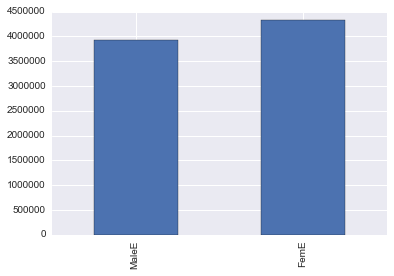

In [22]:
# overall gender distribution
# (df[gender_cols].sum() / df.PopE.sum()).plot(kind='bar').set_title('Citywide Gender Distribution');
df[gender_cols].sum().plot(kind='bar');

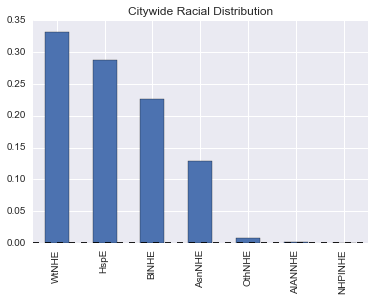

In [20]:
# Racial Distribution
(df[race_cols].sum() / df.PopE.sum()).order(ascending=False).plot(kind='bar').set_title('Citywide Racial Distribution');

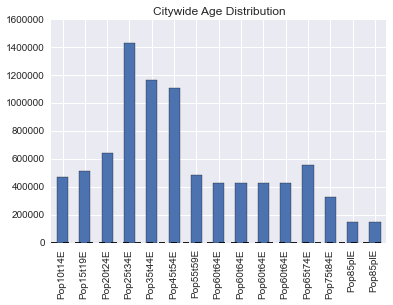

In [21]:
# Citywide age distribution
df[age_cols].sum().plot(kind='bar').set_title('Citywide Age Distribution');

In [29]:
gb_melt = pd.melt(df[loc_cols + gender_cols], id_vars='Borough', value_vars=gender_cols)

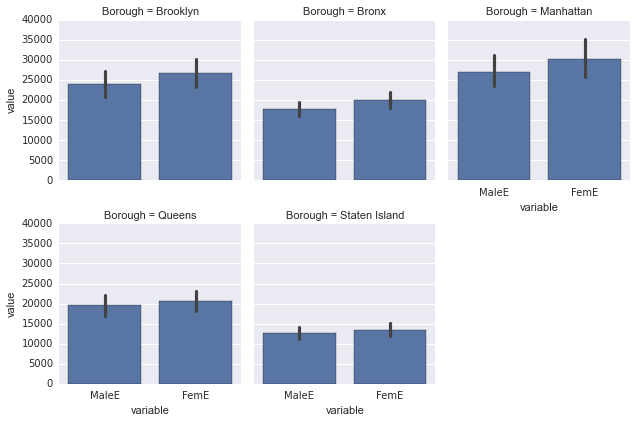

In [302]:
g = sns.FacetGrid(gb_melt, col="Borough", col_wrap=3)
g = g.map(sns.barplot, 'variable', 'value')

In [66]:
race = pd.melt(df[loc_cols + race_cols], id_vars=['Borough', 'GeogName', 'GeoID'], value_vars=race_cols)
race.columns = ['borough', 'neighborhood', 'id', 'race', 'estimate']

In [68]:
race.to_csv('../data/race_melt.csv', index=False)

In [108]:
age = pd.melt(df[loc_cols + age_cols], id_vars=['Borough', 'GeogName', 'GeoID'], value_vars=age_cols)
age.columns = ['borough', 'neighborhood', 'id', 'age', 'estimate']

In [109]:
age.to_csv('../data/age_melt.csv', index=False)

In [110]:
age_cols

['Pop10t14E',
 'Pop15t19E',
 'Pop20t24E',
 'Pop25t34E',
 'Pop35t44E',
 'Pop45t54E',
 'Pop55t59E',
 'Pop60t64E',
 'Pop65t74E',
 'Pop75t84E',
 'Pop85plE']

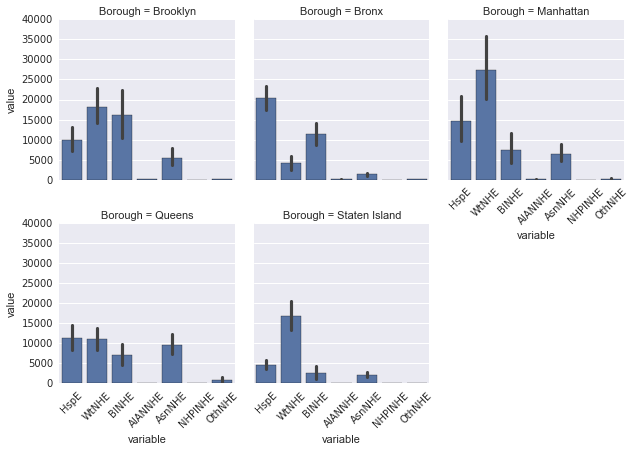

In [311]:
# Race distribution by borough
rb_melt = pd.melt(df[loc_cols + race_cols], id_vars='Borough', value_vars=race_cols)
g = sns.FacetGrid(rb_melt, col="Borough", col_wrap=3)
g = g.map(sns.barplot, 'variable', 'value')
g.set_xticklabels(rotation=45)

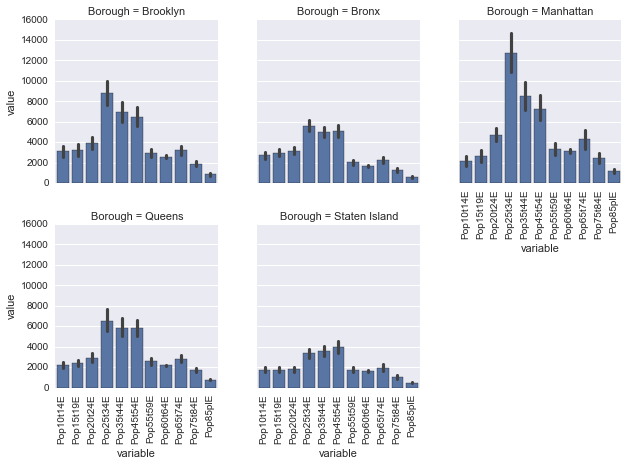

In [95]:
# Age distribution by borough
ab_melt = pd.melt(df[loc_cols + age_cols], id_vars='Borough', value_vars=age_cols)
g = sns.FacetGrid(ab_melt, col="Borough", col_wrap=3)
g = g.map(sns.barplot, 'variable', 'value')
g.set_xticklabels(rotation=90)

### Testing out creating a sample distribution from the data

In [28]:
mean = demo.PopE.ix[0]

In [29]:
merr = demo.PopM.ix[0]

In [30]:
cv = demo.PopC.ix[0]

In [35]:
sd = mean * (cv / 100)